In [3]:
# adapted from kinase_single_well_spectra_edited

# %data


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import string 
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob
from matplotlib.backends.backend_pdf import PdfPages


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:

filename1 = '2018-10-09_17-09-27_plate_7_DLS_EEG.xml'
filename2 = '20181015_DLS_kinase_inh_new_set_2_plate_2.xml'

datapath = 'infinite_results'

In [4]:
# Titration of Ligand Concentrations
conc_array = np.array([80.0,76.5652173913,73.1304347826,69.6956521739,66.2608695652,62.8260869565,59.3913043478,55.9565217391,52.5217391304,49.0869565217,45.652173913,42.2173913043,38.7826086957,35.347826087,31.9130434783,28.4782608696,25.0434782609,21.6086956522,18.1739130435,14.7391304348,11.3043478261,7.86956521739,4.4347826087,1.0], np.float64)
conc_array

array([80.        , 76.56521739, 73.13043478, 69.69565217, 66.26086957,
       62.82608696, 59.39130435, 55.95652174, 52.52173913, 49.08695652,
       45.65217391, 42.2173913 , 38.7826087 , 35.34782609, 31.91304348,
       28.47826087, 25.04347826, 21.60869565, 18.17391304, 14.73913043,
       11.30434783,  7.86956522,  4.43478261,  1.        ])

In [5]:
# reorder conc array for infinite snaking
first_row_conc_array = conc_array[0:12]
print(first_row_conc_array)
second_row_conc_array  = conc_array[12:]
print(second_row_conc_array)
flipped_second_row_conc_array = second_row_conc_array[::-1]
print(flipped_second_row_conc_array)

#snaking conc
conc_array = np.append(first_row_conc_array, flipped_second_row_conc_array)
conc_array

[80.         76.56521739 73.13043478 69.69565217 66.26086957 62.82608696
 59.39130435 55.95652174 52.52173913 49.08695652 45.65217391 42.2173913 ]
[38.7826087  35.34782609 31.91304348 28.47826087 25.04347826 21.60869565
 18.17391304 14.73913043 11.30434783  7.86956522  4.43478261  1.        ]
[ 1.          4.43478261  7.86956522 11.30434783 14.73913043 18.17391304
 21.60869565 25.04347826 28.47826087 31.91304348 35.34782609 38.7826087 ]


array([80.        , 76.56521739, 73.13043478, 69.69565217, 66.26086957,
       62.82608696, 59.39130435, 55.95652174, 52.52173913, 49.08695652,
       45.65217391, 42.2173913 ,  1.        ,  4.43478261,  7.86956522,
       11.30434783, 14.73913043, 18.17391304, 21.60869565, 25.04347826,
       28.47826087, 31.91304348, 35.34782609, 38.7826087 ])

In [6]:
# List well boundaries of titration replicates as dictionary values, 
# in the direction of increasing ligand concentration

ligands = {"Ponatinib1":["A1-A12", "B1-B12"], 
           "Ponatinib2": ["C1-C12","D1-D12"], 
           "Ponatinib3": ["E1-E12", "F1-F12"], 
           "Ponatinib4": ["G1-G12", "H1-H12"],
           "Ponatinib5":["A1-A12", "B1-B12"]}

ligands.keys()

dict_keys(['Ponatinib1', 'Ponatinib2', 'Ponatinib3', 'Ponatinib4', 'Ponatinib5'])

In [7]:
s = (1,24)
reads1 = np.zeros(s)
reads2 = np.zeros(s)
label = 'top_read_ex280_em480'

nreads = len(filename1)
for r in range(nreads):
    read1 = platereader.read_icontrol_xml(os.path.join(datapath, filename1))
    for key, value in read1.items():
        reads1 = (np.append(read1,1))
print(reads1)

for r in range(nreads):
    read2 = platereader.read_icontrol_xml(os.path.join(datapath, filename2))
    for key, value in read2.items():
        reads2 = (np.append(read2,1))
print(reads2)

[{'top_read_ex280_em480': {'A1': '11774', 'A2': '11414', 'A3': '10897', 'A4': '10473', 'A5': '9416', 'A6': '9249', 'A7': '8172', 'A8': '7209', 'A9': '5961', 'A10': '5318', 'A11': '2322', 'A12': '175', 'B12': '65', 'B11': '101', 'B10': '72', 'B9': '52', 'B8': '51', 'B7': '68', 'B6': '72', 'B5': '52', 'B4': '48', 'B3': '74', 'B2': '53', 'B1': '69', 'C1': '13514', 'C2': '13232', 'C3': '12818', 'C4': '12339', 'C5': '11472', 'C6': '10730', 'C7': '11027', 'C8': '9861', 'C9': '8858', 'C10': '8120', 'C11': '7531', 'C12': '6436', 'D12': '174', 'D11': '359', 'D10': '629', 'D9': '1086', 'D8': '1969', 'D7': '2732', 'D6': '3345', 'D5': '4394', 'D4': '4910', 'D3': '5273', 'D2': '5626', 'D1': '5570', 'E1': '14055', 'E2': '13082', 'E3': '13138', 'E4': '12664', 'E5': '11593', 'E6': '11244', 'E7': '9875', 'E8': '7844', 'E9': '3812', 'E10': '163', 'E11': '177', 'E12': '181', 'F12': '82', 'F11': '140', 'F10': '82', 'F9': '68', 'F8': '56', 'F7': '43', 'F6': '44', 'F5': '45', 'F4': '137', 'F3': '44', 'F2': 

In [8]:
# split up reads into 4 sections for ligands and convert to float

#reads1
reads1_values = list((reads1[0][label].values()))
reads1_lig1 = (reads1_values[0:24])
reads1_lig1 = np.array(reads1_lig1, dtype=float) 
print(reads1_lig1)
reads1_lig2 = (reads1_values[24:48])
reads1_lig2 = np.array(reads1_lig2, dtype=float)
print(reads1_lig2)
reads1_lig3 = (reads1_values[48:72])
reads1_lig3 = np.array(reads1_lig3, dtype=float)
print(reads1_lig3)
reads1_lig4 = (reads1_values[72:96])
reads1_lig4 = np.array(reads1_lig4, dtype=float)
print(reads1_lig4)

#reads2
reads2_values = list((reads2[0][label].values()))
reads2_lig1 = (reads2_values[0:24])
reads2_lig1 = np.array(reads2_lig1, dtype=float) 
print(reads2_lig1)

[11774. 11414. 10897. 10473.  9416.  9249.  8172.  7209.  5961.  5318.
  2322.   175.    65.   101.    72.    52.    51.    68.    72.    52.
    48.    74.    53.    69.]
[13514. 13232. 12818. 12339. 11472. 10730. 11027.  9861.  8858.  8120.
  7531.  6436.   174.   359.   629.  1086.  1969.  2732.  3345.  4394.
  4910.  5273.  5626.  5570.]
[14055. 13082. 13138. 12664. 11593. 11244.  9875.  7844.  3812.   163.
   177.   181.    82.   140.    82.    68.    56.    43.    44.    45.
   137.    44.    45.    43.]
[13461. 12789. 12313. 11602. 11473. 11558. 10882.  9458.  8586.  8069.
  7725.  6679.   141.   310.   495.   848.  1418.  2151.  2589.  3863.
  4266.  5133.  4984.  5061.]
[14688. 13416. 13196. 12584. 11996. 11256.  9706.  9026.  8390.  7397.
  6129.  5665.   199.   390.   639.   997.  1463.  2442.  3223.  3544.
  4204.  4778.  5559.  5540.]


In [9]:
# define functions for reading well list associated with each ligand

def extract_fluo(well_dictionary, ligand = "bosutinib", number_of_sections = 2 , number_of_wells_in_each_section = 12):
    """
    For specified ligand, returns a numpy array of fluorescence values 
    where replicates are concatanated after each other.
    """
    ALPHABET = string.ascii_uppercase

    # construct a dictionary that keeps well labels for each replicate keeping experimental order
    
    section_well_labels = {}

    for i in range(number_of_sections):

        well_interval = ligands[ligand][i]
        print(well_interval)
        first_well, last_well = well_interval.split("-")
        #print(first_well, last_well)

        # determine if well series in each section was positioned horizontally or vertically
        if first_well[0:1] == last_well[0:1]:
            print("Section {} is placed horizontally".format(i+1))
            row_name = first_well[0:1]

            well_name_list = []
            for j in range(number_of_wells_in_each_section):
                well_label = row_name + str(j+1)
                well_name_list.append(well_label)
            #print(well_name_list)
            section_well_labels["sec{}".format(i+1)] = well_name_list
            #print('section_well_labels', section_well_labels)

        else:
            #print("Section {} is placed vertically".format(i+1))
            column_name = first_well[1:]

            well_name_list = []
            for j in range(number_of_wells_in_each_section):
                well_label = ALPHABET[j] + column_name
                well_name_list.append(well_label)
            #print(well_name_list)
            section_well_labels["sec{}".format(i+1)] = well_name_list
            
    # Concatanate well labels of all sections to achieve full well name list
    
    full_well_name_list = [] # Concatanate well labels of all sections to achieve full well name list
    
    for i in range(number_of_sections):
        well_name_list = section_well_labels["sec{}".format(i+1)]
        full_well_name_list = full_well_name_list + well_name_list
        
    print("full_well_name_list:\n", full_well_name_list )
    
    # Create numpy array for fluorescence values
    
    fluo_array_1 = np.zeros([number_of_sections*number_of_wells_in_each_section])
    fluo_array_2 = np.zeros([number_of_sections*number_of_wells_in_each_section])
    fluo_array_3 = np.zeros([number_of_sections*number_of_wells_in_each_section])
    fluo_array_4 = np.zeros([number_of_sections*number_of_wells_in_each_section])
    fluo_array_5 = np.zeros([number_of_sections*number_of_wells_in_each_section])

    if ligand == "Ponatinib1":
        fluo_array = reads1_lig1
#         fluo_array_2 = reads2_lig1
    if ligand == "Ponatinib2":
        fluo_array = reads1_lig2
#         fluo_array_2 = reads2_lig2
    if ligand == "Ponatinib3":
        fluo_array = reads1_lig3
#         fluo_array_2 = reads2_lig3
    if ligand == "Ponatinib4":
        fluo_array = reads1_lig4
    if ligand == "Ponatinib5":
        fluo_array = reads2_lig1
#         fluo_array_2 = reads2_lig4
#     for j, well_name in enumerate(full_well_name_list):
#             fluo_array = reads_lig1
#             print(fluo_array)
            #print(well_name, norm_int)
         
#             # If fluorescence is recorded as 'OVER', record it as 0
#             if fluo_array == 'OVER':
#                 fluo_array = 329724 #an arbitrarily high number
#             fluo_array[j] = fluo_reads
            
    return(fluo_array)


def DLS_fluo_plot(concentrations, data1, data2, data3, data4, data5, ligand_name, ymax):
    figure = plt.figure()
    with sns.color_palette("colorblind"):
        plt.plot(concentrations, data1, "o", label='Replicate 1', markersize=4, alpha=0.6)
        plt.plot(concentrations, data2, "o", label='Replicate 2', markersize=4, alpha=0.6)
        plt.plot(concentrations, data3, "o", label='Replicate 3', markersize=4, alpha=0.6)
        plt.plot(concentrations, data4, "o", label='Replicate 4', markersize=4, alpha=0.6)
        plt.plot(concentrations, data5, "o", label='Replicate 5', markersize=4, alpha=0.6)
        plt.legend(loc='upper left', prop={'size': 11})
        plt.title(ligand_name, size=18)
        plt.xlabel("Concentration ($\mu$M)", size=15)
        plt.ylabel("Fluorescence Units", size=15)
        plt.ylim(0, ymax)
        plt.tick_params(axis='y', which='major', labelsize=9)
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.show()
    return(figure)


A1-A12
Section 1 is placed horizontally
B1-B12
Section 2 is placed horizontally
full_well_name_list:
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']
Fluorescence Values [11774. 11414. 10897. 10473.  9416.  9249.  8172.  7209.  5961.  5318.
  2322.   175.    65.   101.    72.    52.    51.    68.    72.    52.
    48.    74.    53.    69.]
C1-C12
Section 1 is placed horizontally
D1-D12
Section 2 is placed horizontally
full_well_name_list:
 ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12']
Fluorescence Values [13514. 13232. 12818. 12339. 11472. 10730. 11027.  9861.  8858.  8120.
  7531.  6436.   174.   359.   629.  1086.  1969.  2732.  3345.  4394.
  4910.  5273.  5626.  5570.]
E1-E12
Section 1 is placed horizontally
F1-F12
Section 2 is placed horizontally
full_well_name_list:
 ['E1', '

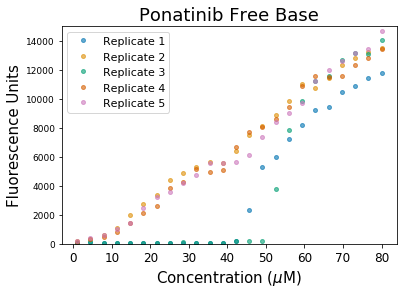

In [10]:
data_array_1 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib1")
print("Fluorescence Values", data_array_1)
data_array_2 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib2")
print("Fluorescence Values", data_array_2)
data_array_3 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib3")
print("Fluorescence Values", data_array_3)
data_array_4 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib4")
print("Fluorescence Values", data_array_4)
data_array_5 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib5")
print("Fluorescence Values", data_array_5)
fig = DLS_fluo_plot(concentrations = conc_array, data1 = data_array_1, data2 = data_array_2, data3 = data_array_3, data4 = data_array_4, data5 = data_array_5, ligand_name = "Ponatinib Free Base", ymax = 15000)

A1-A12
Section 1 is placed horizontally
B1-B12
Section 2 is placed horizontally
full_well_name_list:
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']
C1-C12
Section 1 is placed horizontally
D1-D12
Section 2 is placed horizontally
full_well_name_list:
 ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12']
E1-E12
Section 1 is placed horizontally
F1-F12
Section 2 is placed horizontally
full_well_name_list:
 ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12']
G1-G12
Section 1 is placed horizontally
H1-H12
Section 2 is placed horizontally
full_well_name_list:
 ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H

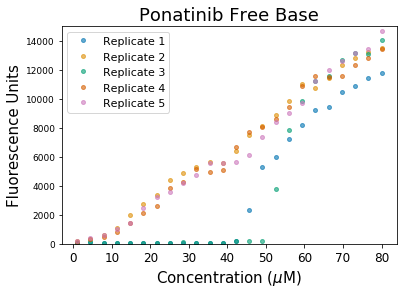

In [11]:
# Save plot in a pdf
pdf = PdfPages("20181026_kinase_inh_comparison_ponatinib_fluorescence.pdf")

data_array_1 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib1")
data_array_2 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib2")
data_array_3 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib3")
data_array_4 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib4")
data_array_5 = extract_fluo(well_dictionary = ligands, ligand = "Ponatinib5")
plot1 = DLS_fluo_plot(concentrations = conc_array, data1 = data_array_1, data2 = data_array_2, data3 = data_array_3, data4 = data_array_4, data5 = data_array_5, ligand_name = "Ponatinib Free Base", ymax = 15000)
pdf.savefig(plot1)
    
pdf.close()